In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns


In [3]:
#We do not select season 2016-17 due to it having no column: now_cost

clean_data = {}
seasons = ['2017-18','2018-19','2019-20','2020-21']

for year in seasons:
    clean_data[year] = pd.read_csv('data/' + year + '/cleaned_players.csv')

clean_frames=[]
for key, df in clean_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['now_cost'] = df['now_cost']/10
    df['ppv'] = df['total_points']/df['now_cost']
    df['year'] = key[:4]
    clean_frames.append(df)

raw_data = {}

for year in seasons:
    raw_data[year] = pd.read_csv('data/' + year + '/players_raw.csv')

raw_frames=[]
for key, df in raw_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['year'] = key[:4]
    raw_frames.append(df)


team_data = pd.read_csv('data/master_team_list.csv')
team_data['season'] = team_data['season'].map(lambda x: x[:4])
team_data.rename(columns ={'season':'year'},inplace=True)
team_data

,year,team,team_name
0,2016,1,Arsenal
1,2016,2,Bournemouth
2,2016,3,Burnley
3,2016,4,Chelsea
4,2016,5,Crystal Palace
...,...,...,...
95,2020,16,Southampton
96,2020,17,Spurs
97,2020,18,West Brom
98,2020,19,West Ham


In [5]:
#Concat Dataframes in List 
raw_result = pd.concat(raw_frames)
clean_result = pd.concat(clean_frames).drop(['element_type'],axis=1)
team_data

raw_result.columns
raw_result[['year','first_name','second_name','element_type','team']]
team_data.columns
join_1 = raw_result.join(team_data.set_index(['year','team']), on = ['year','team'])[['year','first_name','second_name','element_type','team_name']]
#join_1.columns
data=clean_result.merge(join_1,on=['year','first_name','second_name'])
#clean_result.join(join_1.set_index(['year','first_name','second_name']), on=['year','first_name','second_name']).reset_index()


def position_name(x):
    if x==1:
        return 'GK'
    elif x==2:
        return 'DEF'
    elif x==3:
       return 'MID'
    else:
        return 'FWD'


data['position']=data.apply(lambda x:position_name(x['element_type']),axis=1)
#ame(x[#'element_type']), data.apply(lambda x: x['now_cost']/) ##Find the difference## between eppv and ppv=1)
#data['eff_ppv'] =  bn
#Join the raw and clean result 
#result = clean_result.join(raw_result, on = '') 

#Change year to INT
#result.year = result.year.astype('int64')

#result[result.year==2019].head(10)

In [6]:
f1_data = data[data.minutes>1000]
df1 = f1_data.groupby(by=['year','position']).head(20)
df1.groupby(by=['year','position']).agg(['mean','std'])['ppv']


mean       std
year position                     
2017 DEF       22.492828  1.596054
     FWD       16.992698  2.988986
     GK        24.616701  5.794819
     MID       21.378400  4.246464
2018 DEF       26.180821  3.423149
     FWD       19.730374  3.836629
     GK        24.484566  5.414909
     MID       21.705685  3.083273
2019 DEF       25.201411  2.927116
     FWD       19.348931  4.174494
     GK        24.467299  5.263908
     MID       20.535416  2.625203
2020 DEF       24.202952  2.911909
     FWD       18.779839  4.410978
     GK        25.448558  4.362823
     MID       21.559419  5.046416

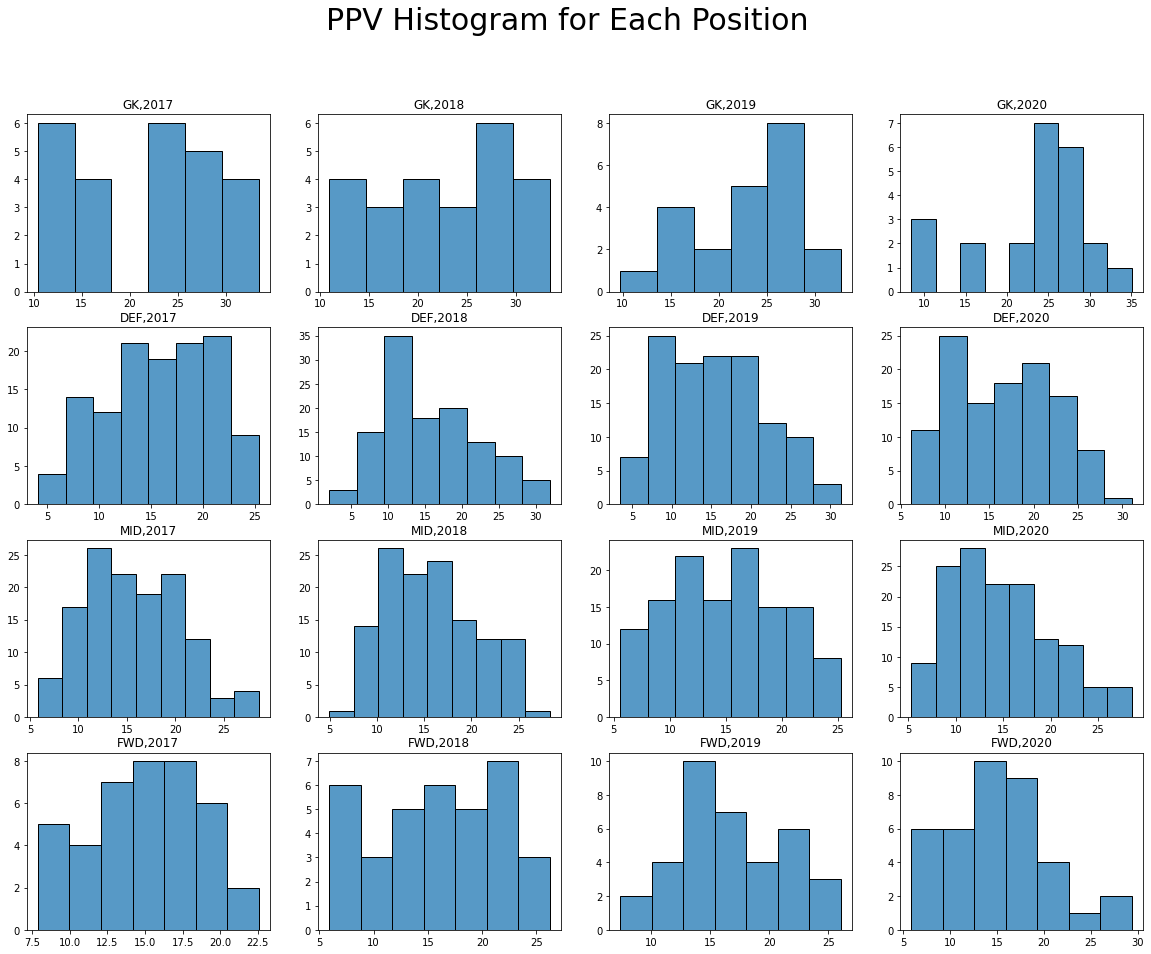

In [31]:
#Histogram


position = ['GK','DEF','MID','FWD']
years = ['2017','2018','2019','2020']
step = 1

#Adding Main Fig and Main A
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
fig.suptitle('PPV Histogram for Each Position',fontsize=30)
plt.axis('off')

# Set common labels
ax.set_xlabel('Points Per Value', fontsize=20)
ax.set_ylabel('Count', fontsize = 20)


#Plotting subplots
for x in position:
    for y in years:
        sub_ax = fig.add_subplot(4,4,step)
        data = f1_data.loc[(f1_data.position==x) & (f1_data.year==y)].ppv
        g = sns.histplot(data=data)
        g.set(title = '{},{}'.format(x,y))
        g.set(xlabel=None,ylabel=None)
        step+=1



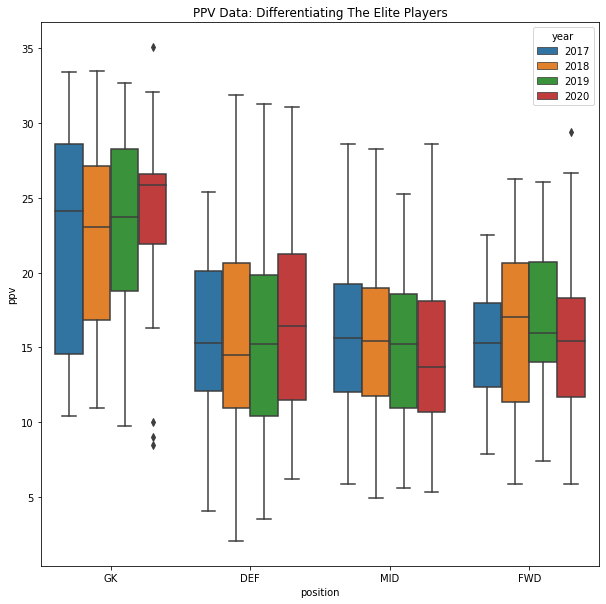

In [27]:
#BoxPlot

plt.figure(figsize=(10,10))
b = sns.boxplot(x='position', y='ppv', hue='year', order = ["GK","DEF","MID","FWD"], data=f1_data);
b.set(title = 'PPV Data: Differentiating The Elite Players')


#Adding Labels to Outliers - In Progress
#plt.text(0.35K3520,'test)#
f_data=df
#f1_data.groupby(by=['year','position']).quantile(0.25)['ppv']q1 #= 1_datdfpby(by=['year','position']).quantile(0.25)['ppv'].t7_numpy()
#out#lir_top_#lim = month_q3 + 1month_q3-m#1)oubott#om_lim = month_q1 - 1month_q3-m1)
#p_lim[][11

In [25]:
df_2021 = pd.read_csv('data/2020-21/cleaned_players.csv')

In [26]:
f1_data.columns

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'ppv', 'year',
       'element_type', 'team_name', 'position'],
      dtype='object')

In [27]:
df_2021 = df_2021.sort_values('total_points',ascending=False)

In [29]:
df_2021['now_cost'] = df_2021['now_cost']/10
df_2021['ppv'] = df_2021['total_points']/df_2021['now_cost']

In [30]:
df_2021_gk = df_2021.loc[(df_2021.element_type=='GK') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)
df_2021_def = df_2021.loc[(df_2021.element_type=='DEF') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)
df_2021_mid = df_2021.loc[(df_2021.element_type=='MID') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)
df_2021_fwd = df_2021.loc[(df_2021.element_type=='FWD') & (df_2021.minutes>500)].sort_values('ppv',ascending=False)

In [31]:
df_2021_gk.head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
34,Emiliano,Martínez,0,0,186,3420,46,20.0,1067.2,0.0,27,825,108.5,15,0,1,37.9,0.53,GK,350.943396
333,Illan,Meslier,0,0,154,3150,52,10.0,1026.0,0.0,20,774,103.7,11,0,0,8.5,0.48,GK,320.833333
614,Sam,Johnstone,0,1,140,3330,74,10.0,1213.6,0.0,19,768,122.4,6,0,1,3.0,0.46,GK,304.347826
266,Alphonse,Areola,0,0,124,3240,48,0.0,876.2,0.0,9,637,87.4,9,0,2,4.7,0.45,GK,275.555556
515,Aaron,Ramsdale,0,0,123,3420,63,20.0,1023.0,4.0,12,685,104.7,5,0,1,2.0,0.46,GK,267.391304
567,Hugo,Lloris,0,0,149,3420,45,0.0,868.0,0.0,13,702,86.7,12,0,0,6.6,0.56,GK,266.071429
644,Lukasz,Fabianski,0,0,133,3150,44,0.0,745.2,0.0,11,634,74.4,10,0,2,3.2,0.50,GK,266.000000
165,Edouard,Mendy,0,0,140,2745,25,0.0,470.2,0.0,8,613,47.2,16,0,2,10.9,0.53,GK,264.150943
398,Ederson,Santana de Moraes,0,1,160,3240,28,10.0,586.0,0.0,3,696,59.6,19,0,3,9.4,0.61,GK,262.295082
7,Bernd,Leno,0,0,131,3131,37,0.0,702.2,2.0,11,625,70.3,11,1,0,7.3,0.50,GK,262.000000


In [32]:
df_2021_def.head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
320,Stuart,Dallas,8,3,171,3410,53,454.6,756.8,527.0,15,726,174.2,12,0,7,33.1,0.55,DEF,310.909091
49,Matt,Targett,0,4,138,3404,44,607.0,690.4,122.0,9,710,142.2,16,0,7,12.0,0.50,DEF,276.000000
76,Lewis,Dunk,5,0,130,2932,40,136.7,720.4,443.0,17,626,130.2,11,2,5,5.9,0.48,DEF,270.833333
648,Aaron,Cresswell,0,11,153,3170,41,898.6,669.4,96.0,21,730,166.8,11,0,3,18.2,0.57,DEF,268.421053
665,Vladimir,Coufal,0,9,128,3054,43,670.9,693.8,220.0,12,625,158.7,9,0,3,8.6,0.48,DEF,266.666667
53,Ezri,Konsa Ngoyo,2,0,119,3195,46,34.2,695.6,276.0,8,580,101.0,12,0,3,6.2,0.46,DEF,258.695652
210,Michael,Keane,3,1,127,2989,43,87.8,814.0,243.0,13,649,114.5,11,0,4,6.3,0.50,DEF,254.000000
393,John,Stones,4,0,128,1933,12,79.8,520.0,192.0,11,531,79.0,14,1,0,9.7,0.51,DEF,250.980392
321,Ezgjan,Alioski,2,3,110,2456,35,423.0,477.8,281.0,7,449,118.5,10,0,7,3.2,0.44,DEF,250.000000
443,Aaron,Wan-Bissaka,2,5,144,3060,36,498.2,785.4,159.0,11,729,144.1,13,0,3,18.8,0.58,DEF,248.275862


In [33]:
df_2021_mid.sort_values('ppv', ascending=False).head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
323,Jack,Harrison,8,10,160,2846,45,821.7,759.2,666.0,15,542,225.2,11,0,2,7.6,0.56,MID,285.714286
391,Ilkay,Gündogan,13,4,157,2025,16,688.4,754.6,712.0,22,620,215.7,12,0,1,17.1,0.55,MID,285.454545
625,Matheus,Pereira,11,7,153,2574,58,873.6,744.0,661.0,15,565,227.9,6,1,2,5.0,0.54,MID,283.333333
661,Tomas,Soucek,10,2,147,3420,47,271.1,889.8,925.0,16,555,208.8,11,1,7,11.2,0.52,MID,282.692308
542,James,Ward-Prowse,8,7,156,3420,68,971.2,940.0,355.0,17,772,226.5,9,0,5,11.7,0.59,MID,264.406780
658,Jarrod,Bowen,8,6,141,2556,33,493.5,529.8,812.0,8,434,183.7,9,0,0,2.5,0.58,MID,243.103448
145,Jorge Luiz,Frello Filho,7,2,114,2006,17,383.5,588.8,175.0,15,485,114.9,14,0,2,4.7,0.47,MID,242.553191
83,Leandro,Trossard,5,6,132,2602,30,725.1,543.4,759.0,15,406,202.8,12,0,2,1.8,0.55,MID,240.000000
341,Raphael,Dias Belloli,6,10,133,2358,34,889.3,719.6,902.0,11,489,251.3,9,0,3,9.4,0.56,MID,237.500000
574,Heung-Min,Son,17,11,228,3119,36,1049.9,1052.2,1046.0,26,777,315.2,13,0,0,44.2,0.96,MID,237.500000


In [34]:
df_2021_mid[df_2021_mid.second_name=='Salah']

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
363,Mohamed,Salah,22,6,231,3077,41,825.7,1056.0,1980.0,21,657,385.8,11,0,0,43.6,1.29,MID,179.069767


In [35]:
df_2021_fwd.head(10)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,ppv
322,Patrick,Bamford,17,11,194,3052,50,371.0,867.2,1512.0,26,631,274.6,10,0,3,45.2,0.66,FWD,293.939394
62,Ollie,Watkins,14,9,168,3328,46,610.4,815.4,1721.0,18,531,314.0,14,1,2,22.1,0.63,FWD,266.666667
548,Che,Adams,9,7,137,2662,51,488.6,581.8,964.0,16,443,203.4,7,0,1,4.1,0.57,FWD,240.350877
218,Dominic,Calvert-Lewin,16,6,165,2871,39,308.0,745.8,1439.0,21,528,249.0,11,0,3,29.5,0.75,FWD,220.000000
120,Chris,Wood,12,3,138,2741,43,323.2,595.8,1129.0,16,395,204.0,9,0,0,5.6,0.66,FWD,209.090909
490,Callum,Wilson,12,6,134,2081,37,230.4,557.4,761.0,22,409,154.7,5,0,2,5.1,0.65,FWD,206.153846
572,Harry,Kane,23,14,242,3083,39,659.1,1318.2,1585.0,40,880,355.9,12,0,1,44.5,1.19,FWD,203.361345
177,Christian,Benteke,10,2,106,1808,34,236.5,512.6,1030.0,14,338,177.7,5,1,1,1.3,0.55,FWD,192.727273
497,David,McGoldrick,8,1,100,2391,37,320.2,464.4,860.0,12,344,164.6,9,0,7,1.3,0.52,FWD,192.307692
286,Jamie,Vardy,15,14,187,2838,44,356.6,819.2,1306.0,23,649,248.3,8,0,1,17.5,1.02,FWD,183.333333


In [37]:
f1_data.columns

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'ppv', 'year',
       'element_type', 'team_name', 'position'],
      dtype='object')